In [218]:
import sklearn
from sklearn.datasets import make_circles

In [219]:
#Make 1000 samples
n_samples = 1000

X, y = make_circles(n_samples,        #sample number
                    noise=0.05,       #add randomness to our data
                    random_state=42) #same as random seed

In [220]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")
# First 5 samples of X: [[ 0.75424625  0.23148074]   2 features of X for every y
#  [-0.75615888  0.15325888]
#  [-0.81539193  0.17328203]
#  [-0.39373073  0.69288277]
#  [ 0.44220765 -0.89672343]]
# First 5 samples of y: [1 1 1 1 0]       y is binary

First 5 samples of X: [[ 0.74220688  0.24668576]
 [-0.7340323   0.16869164]
 [-0.82985872  0.22195899]
 [-0.42913559  0.67223019]
 [ 0.44560223 -0.89493556]]
First 5 samples of y: [1 1 1 1 0]


In [221]:
#Make dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2" : X[:, 1],
                        "label": y})
circles.head(10)
# 0.7542462506997276,0.23148073787097836,1
# -0.7561588822214413,0.15325887663494678,1
# -0.8153919335251194,0.17328202920351576,1
# -0.393730728902315,0.6928827699017868,1
# 0.4422076451826442,-0.8967234339920015,0
# -0.4796463680909052,0.6764347685615512,1
# -0.01364835948765009,0.8033487191694424,1
# 0.771513273784567,0.14775958770972614,1
# -0.1693223397310359,-0.7934557525393878,1
# -0.12148579609572473,1.0215090535090692,0

,X1,X2,label
0,0.74221,0.24669,1
1,-0.73403,0.16869,1
2,-0.82986,0.22196,1
3,-0.42914,0.67223,1
4,0.44560,-0.89494,0
5,-0.46989,0.70804,1
6,-0.01605,0.80562,1
7,0.75962,0.15953,1
8,-0.17569,-0.79984,1
9,-0.11062,1.04221,0


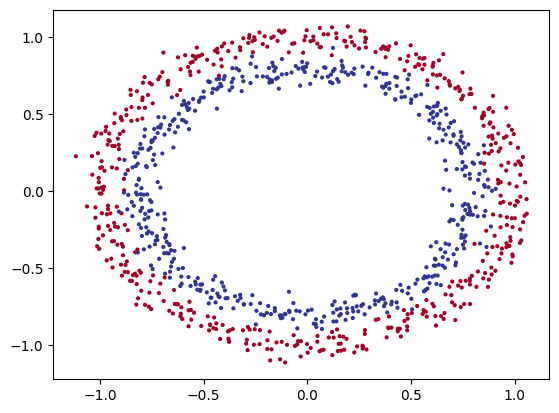

In [222]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],  #x coords are 1st col of X
            y=X[:, 1],  #y coords are 2nd col of X
            s=4,        #size
            c=y,        #we color the dots based on y col
            cmap=plt.cm.RdYlBu); #set dots to red yellow and blue

In [223]:
X.shape, y.shape
#((1000, 2), (1000,))     x has 2 features, y is just a scalar

((1000, 2), (1000,))

In [224]:
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample}")
print(f"Values for one sample of y: {y_sample}")

Values for one sample of X: [0.74220688 0.24668576]
Values for one sample of y: 1


In [225]:
# Turn data into Tensors
import torch
X = torch.from_numpy(X).type(torch.float) #default  for torch is is float 32,
y = torch.from_numpy(y).type(torch.float) #default for numpy is float64

X[:5], y[:5]
# (tensor([[ 0.7422,  0.2467],
#          [-0.7340,  0.1687],
#          [-0.8299,  0.2220],
#          [-0.4291,  0.6722],
#          [ 0.4456, -0.8949]]),
#  tensor([1., 1., 1., 1., 0.]))

(tensor([[ 0.7422,  0.2467],
         [-0.7340,  0.1687],
         [-0.8299,  0.2220],
         [-0.4291,  0.6722],
         [ 0.4456, -0.8949]]),
 tensor([1., 1., 1., 1., 0.]))

In [226]:
# Split data into training and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #20% of data is test
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [227]:
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [228]:
from sklearn import datasets
# 1 Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2,   # number of features in X
                                 out_features=5)  # arbitrary
        self.layer_2 = nn.Linear(in_features=5,   # output from above is passed in
                                 out_features=1)  # prediction for y is returned
    # 3. Define a forward method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) #layer 2 is passed in layer 1 which is passed in X

# 4. Instatiate an instance of ouor model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [229]:
next(model_0.parameters())
# Parameter containing:
# tensor([[ 0.6906,  0.2828],
#         [-0.4356,  0.6881],
#         [ 0.2373,  0.3026],
#         [-0.1352,  0.1721],
#         [ 0.1612, -0.4702]], requires_grad=True)

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188]], requires_grad=True)

In [230]:
# Lets replicate the above model using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0
# Sequential(
#   (0): Linear(in_features=2, out_features=5, bias=True)
#   (1): Linear(in_features=5, out_features=1, bias=True)
# )

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [231]:
next(model_0.parameters())

Parameter containing:
tensor([[-0.0829, -0.2872],
        [ 0.4691, -0.5582],
        [-0.3260, -0.1997],
        [-0.4252,  0.0667],
        [-0.6984,  0.6386]], requires_grad=True)

In [232]:
# Make some predictions
model_0.state_dict()
# OrderedDict([('0.weight',     2 weight and bias tensors
#               tensor([[ 0.0057, -0.0453],
#                       [ 0.1261,  0.3403],
#                       [ 0.2177,  0.3748],
#                       [ 0.2893, -0.1224],
#                       [-0.3013,  0.2374]])),
#              ('0.bias', tensor([ 0.5627, -0.0750,  0.3069, -0.6305, -0.3226])),
#              ('1.weight',
#               tensor([[-0.0556, -0.2433,  0.1876,  0.3159, -0.3312]])),
#              ('1.bias', tensor([-0.3915]))])

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [233]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of Predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")
# Length of Predictions: 200, Shape: torch.Size([200, 1])
# Length of test samples: 200, Shape: torch.Size([200, 2])
#
# First 10 predictions:
# tensor([[-0.5978],
#         [-0.5462],
#         [-0.5385],
#         [-0.6152],
#         [-0.2614],
#         [-0.2321],
#         [-0.3313],
#         [-0.2592],
#         [-0.5429],
#         [-0.5515]])
#
# First 10 labels:
# tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

Length of Predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.0307],
        [-0.0213],
        [ 0.0896],
        [-0.0678],
        [ 0.3020],
        [ 0.3048],
        [ 0.1451],
        [ 0.2192],
        [ 0.0906],
        [-0.0265]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [234]:
# Setup loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss() #sigmoid activation function e.g. 0 to 1

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01)

In [235]:
# Calculate accuracy - out of 100 examples, what percentage do we get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()  #sums the equivalencies between the tensors
    acc = (correct / len(y_true)) * 100
    return acc

In [236]:
# View the first 5 outputs of the forward pass on the test data
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))
len(y_logits)
# 0,-0.59783
# 1,-0.54622
# 2,-0.53848
# 3,-0.61515
# 4,-0.26140


200

In [237]:
y_pred_probs = torch.sigmoid(y_logits)[:5]
y_pred_probs
# 0,0.35484
# 1,0.36674
# 2,0.36854
# 3,0.35089
torch.round(y_pred_probs)
# 0,0.0
# 1,0.0
# 2,0.0
# 3,0.0

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [238]:
y_preds = torch.round(y_pred_probs)

# pass X_test through our model, send it through the sigmoid, and round it
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze(), y_pred_labels.squeeze()

#tensor([True, True, True, True, True])

tensor([True, True, True, True, True])


(tensor([0., 0., 1., 0., 1.]),
 tensor([0., 0., 1., 0., 1.], grad_fn=<SqueezeBackward0>))

In [239]:
torch.manual_seed(42)

#Put data to target device
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    model_0.train()
    #1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #turn logits into pred probabilities into pred labels

    #2. Calc loss and accuracy
    loss = loss_fn(y_logits, # Because we are using BCEWithLogitsLoss,
                             # we must pass in logits and NOT probabilities
                             # like normal. This combines the sigmoud with BCE loss
                   y_train)
    acc = accuracy_fn(y_true=y_train,  # This is our own testing function that we made
                      y_pred=y_pred)   # earlier

    # 3. Optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Back propagation
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the test loss / accuracy
        test_loss = loss_fn(test_logits,          # in Torch, we always pass in the test
                            y_test)               # followed by the training data
        test_acc = accuracy_fn(y_true=y_test,     # in scikit-learn, which our function
                               y_pred=test_pred)  # seeks to mimic, we pass the training data
                                                  # followed by the prediction data
    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {test_loss: .5f} | Test Acc: {test_acc:.2f}")
# Epoch: 0 | Loss: 0.69812 | Acc: 55.25 | Test Loss:  0.70413 | Test Acc: 49.00
# Epoch: 10 | Loss: 0.69780 | Acc: 55.12 | Test Loss:  0.70377 | Test Acc: 49.00
# Epoch: 20 | Loss: 0.69752 | Acc: 55.25 | Test Loss:  0.70343 | Test Acc: 48.50
# Epoch: 30 | Loss: 0.69725 | Acc: 54.75 | Test Loss:  0.70312 | Test Acc: 49.50
# Epoch: 40 | Loss: 0.69701 | Acc: 54.50 | Test Loss:  0.70284 | Test Acc: 49.00
# Epoch: 50 | Loss: 0.69678 | Acc: 54.37 | Test Loss:  0.70257 | Test Acc: 48.50
# Epoch: 60 | Loss: 0.69657 | Acc: 53.75 | Test Loss:  0.70232 | Test Acc: 49.00
# Epoch: 70 | Loss: 0.69638 | Acc: 53.75 | Test Loss:  0.70209 | Test Acc: 48.50
# Epoch: 80 | Loss: 0.69620 | Acc: 53.75 | Test Loss:  0.70188 | Test Acc: 49.00
# Epoch: 90 | Loss: 0.69604 | Acc: 53.25 | Test Loss:  0.70168 | Test Acc: 48.50

Epoch: 0 | Loss: 0.69802 | Acc: 52.25 | Test Loss:  0.69452 | Test Acc: 57.50
Epoch: 10 | Loss: 0.69774 | Acc: 52.00 | Test Loss:  0.69431 | Test Acc: 58.00
Epoch: 20 | Loss: 0.69747 | Acc: 52.00 | Test Loss:  0.69411 | Test Acc: 57.50
Epoch: 30 | Loss: 0.69723 | Acc: 51.62 | Test Loss:  0.69394 | Test Acc: 56.50
Epoch: 40 | Loss: 0.69700 | Acc: 51.50 | Test Loss:  0.69378 | Test Acc: 56.50
Epoch: 50 | Loss: 0.69679 | Acc: 51.88 | Test Loss:  0.69363 | Test Acc: 56.50
Epoch: 60 | Loss: 0.69660 | Acc: 51.50 | Test Loss:  0.69350 | Test Acc: 56.00
Epoch: 70 | Loss: 0.69642 | Acc: 51.00 | Test Loss:  0.69338 | Test Acc: 56.00
Epoch: 80 | Loss: 0.69626 | Acc: 51.00 | Test Loss:  0.69327 | Test Acc: 55.00
Epoch: 90 | Loss: 0.69610 | Acc: 51.00 | Test Loss:  0.69317 | Test Acc: 54.50
Epoch: 100 | Loss: 0.69596 | Acc: 51.12 | Test Loss:  0.69308 | Test Acc: 54.50
Epoch: 110 | Loss: 0.69582 | Acc: 51.12 | Test Loss:  0.69300 | Test Acc: 54.50
Epoch: 120 | Loss: 0.69570 | Acc: 51.12 | Test Loss

In [240]:
# 4. Visualize
import requests
from pathlib import Path

# Download helper functions from Learn Pytorch Repo. Get the info at the link, create our file
# with write permissions, and then write the contents of the request
if not Path("helper_functions.py").is_file():
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

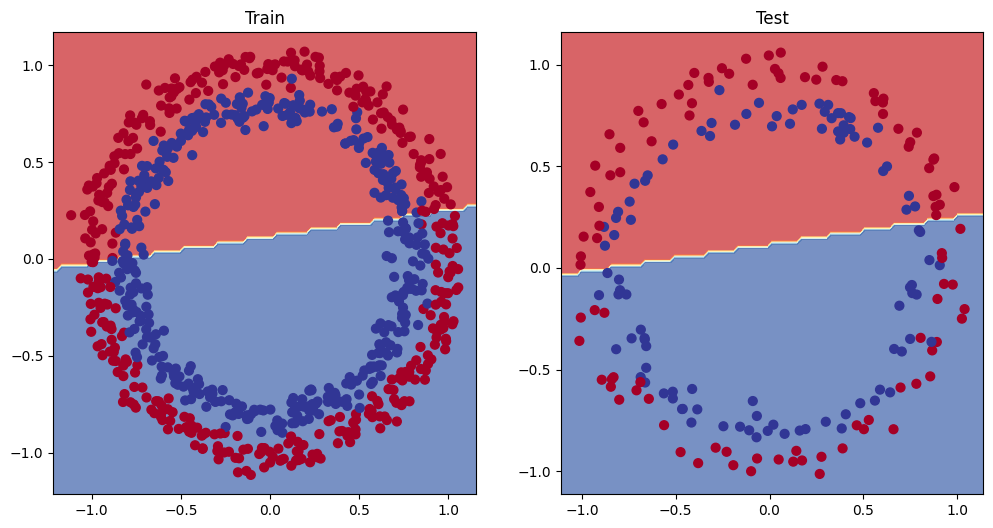

In [241]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)  #rows, cols, slot in plot
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [242]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return(self.layer_3(self.layer_2(self.layer_1(x))))

model_1 = CircleModelV1().to(device)
model_1
# CircleModelV1(
#   (layer_1): Linear(in_features=2, out_features=10, bias=True)
#   (layer_2): Linear(in_features=10, out_features=10, bias=True)
#   (layer_3): Linear(in_features=10, out_features=1, bias=True)
# )

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [243]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# and an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [244]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)
epochs = 1000

for epoch in range(epochs):
    model_1.train()
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> probabilities -> definite labels
    # 2. Loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    # 3-5. Zero grad, backpropagate, step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_1.eval()
    with torch.inference_mode():
        #1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: %{acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: %{test_acc:.2f}")
# Epoch: 0 | Loss: 0.71086 | Acc: %50.00 | Test Loss: 0.70705 | Test Acc: %50.00
# Epoch: 100 | Loss: 0.69310 | Acc: %49.00 | Test Loss: 0.69346 | Test Acc: %49.00
# Epoch: 200 | Loss: 0.69300 | Acc: %51.25 | Test Loss: 0.69423 | Test Acc: %47.50
# Epoch: 300 | Loss: 0.69298 | Acc: %51.00 | Test Loss: 0.69450 | Test Acc: %45.50
# Epoch: 400 | Loss: 0.69298 | Acc: %51.25 | Test Loss: 0.69460 | Test Acc: %46.00
# Epoch: 500 | Loss: 0.69298 | Acc: %51.25 | Test Loss: 0.69464 | Test Acc: %46.00
# Epoch: 600 | Loss: 0.69298 | Acc: %51.50 | Test Loss: 0.69466 | Test Acc: %45.50
# Epoch: 700 | Loss: 0.69298 | Acc: %51.50 | Test Loss: 0.69466 | Test Acc: %45.50
# Epoch: 800 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50
# Epoch: 900 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50


Epoch: 0 | Loss: 0.69393 | Acc: %51.00 | Test Loss: 0.69264 | Test Acc: %50.00
Epoch: 100 | Loss: 0.69305 | Acc: %50.50 | Test Loss: 0.69379 | Test Acc: %48.00
Epoch: 200 | Loss: 0.69299 | Acc: %51.12 | Test Loss: 0.69436 | Test Acc: %47.00
Epoch: 300 | Loss: 0.69298 | Acc: %51.00 | Test Loss: 0.69456 | Test Acc: %46.00
Epoch: 400 | Loss: 0.69298 | Acc: %51.38 | Test Loss: 0.69463 | Test Acc: %45.50
Epoch: 500 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69465 | Test Acc: %45.50
Epoch: 600 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50
Epoch: 700 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50
Epoch: 800 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50
Epoch: 900 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50


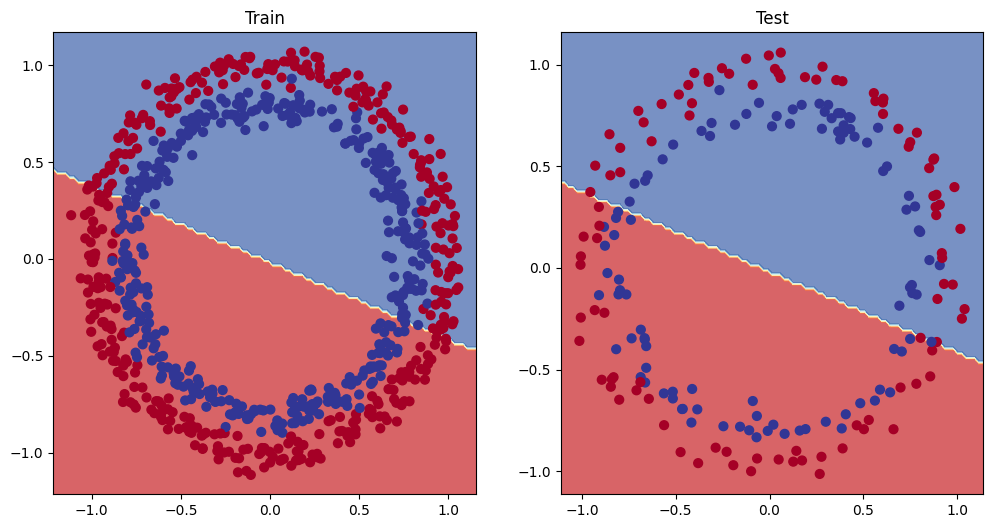

In [245]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)  #rows, cols, slot in plot
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [246]:
# Prep data to see if our model is even working at all for anything

In [247]:
# Create some data to make sure model is working
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [248]:
train_split = int(len(X_regression) * 0.8)
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

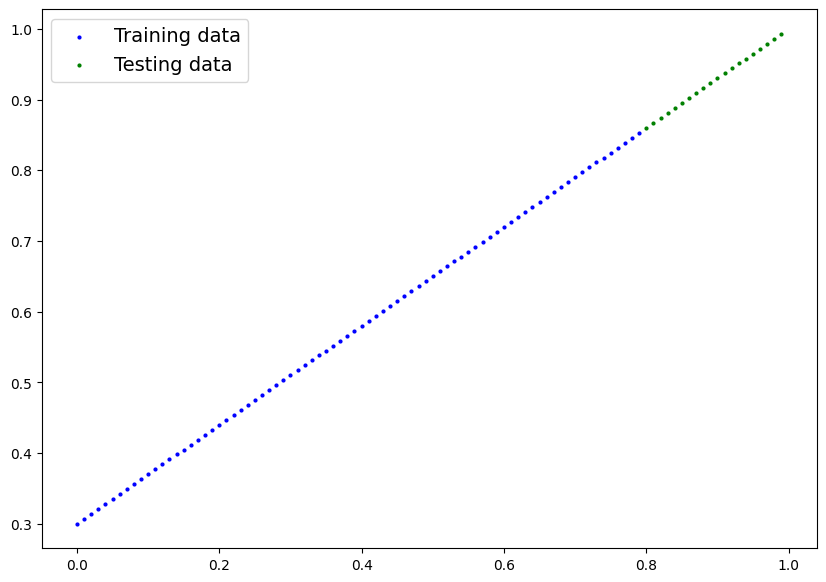

In [249]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [250]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [251]:
# Adjusting model_1 to fit a straight line
# right now, it takes in 2 input features. It only needs to take in one
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr=0.001)

In [252]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)

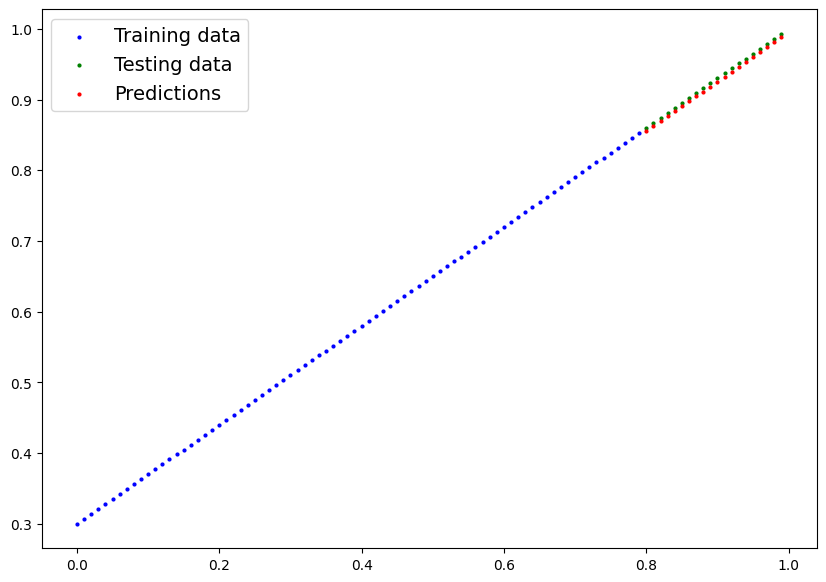

In [253]:
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds)

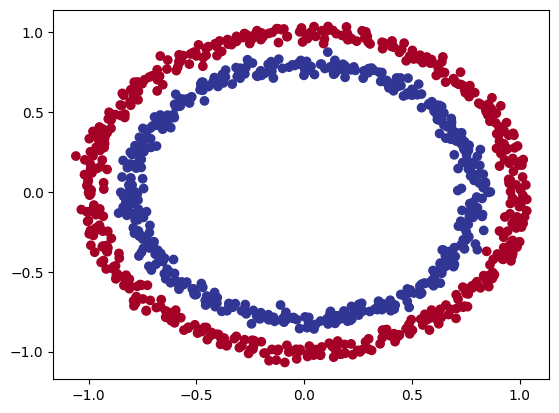

In [254]:
#re initialize data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [255]:
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]
# (tensor([[ 0.6579, -0.4651],
#          [ 0.6319, -0.7347],
#          [-1.0086, -0.1240],
#          [-0.9666, -0.2256],
#          [-0.1666,  0.7994]]),
#  tensor([1., 0., 0., 0., 1.]))

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [256]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self,x):
        # Pass each layer through relu function
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)

In [257]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.01)

In [258]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 10000

for epoch in range(epochs):
    model_3.train()
    # 1.Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> probabilities -> labels
    # 2.Calculate Loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train,
                      y_pred = y_pred)
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss Backward
    loss.backward()
    # 5. Step Optimizer
    optimizer.step()

    # Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test,
                               y_pred = test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.2f}% | Test Loss {test_loss: .4f} | Test Accuracy {test_acc:.2f}")
# Epoch: 0 | Loss: 0.5675 | Accuracy: 88.00% | Test Loss  0.5732 | Test Accuracy 86.50
# Epoch: 100 | Loss: 0.4805 | Accuracy: 93.50% | Test Loss  0.4985 | Test Accuracy 90.50
# Epoch: 200 | Loss: 0.3694 | Accuracy: 97.88% | Test Loss  0.4049 | Test Accuracy 92.50
# Epoch: 300 | Loss: 0.2536 | Accuracy: 99.00% | Test Loss  0.3023 | Test Accuracy 96.50
# Epoch: 400 | Loss: 0.1712 | Accuracy: 99.50% | Test Loss  0.2204 | Test Accuracy 97.50
# Epoch: 500 | Loss: 0.1215 | Accuracy: 99.75% | Test Loss  0.1647 | Test Accuracy 99.00
# Epoch: 600 | Loss: 0.0910 | Accuracy: 99.88% | Test Loss  0.1271 | Test Accuracy 99.50
# Epoch: 700 | Loss: 0.0708 | Accuracy: 99.88% | Test Loss  0.1030 | Test Accuracy 99.50
# Epoch: 800 | Loss: 0.0576 | Accuracy: 99.88% | Test Loss  0.0866 | Test Accuracy 99.50
# Epoch: 900 | Loss: 0.0484 | Accuracy: 99.88% | Test Loss  0.0746 | Test Accuracy 99.50

Epoch: 0 | Loss: 0.6929 | Accuracy: 50.00% | Test Loss  0.6932 | Test Accuracy 50.00
Epoch: 100 | Loss: 0.6925 | Accuracy: 50.38% | Test Loss  0.6926 | Test Accuracy 50.00
Epoch: 200 | Loss: 0.6922 | Accuracy: 59.00% | Test Loss  0.6923 | Test Accuracy 56.00
Epoch: 300 | Loss: 0.6921 | Accuracy: 70.12% | Test Loss  0.6921 | Test Accuracy 67.00
Epoch: 400 | Loss: 0.6919 | Accuracy: 68.38% | Test Loss  0.6920 | Test Accuracy 70.00
Epoch: 500 | Loss: 0.6918 | Accuracy: 58.50% | Test Loss  0.6918 | Test Accuracy 62.00
Epoch: 600 | Loss: 0.6917 | Accuracy: 54.00% | Test Loss  0.6916 | Test Accuracy 56.00
Epoch: 700 | Loss: 0.6915 | Accuracy: 53.25% | Test Loss  0.6915 | Test Accuracy 53.00
Epoch: 800 | Loss: 0.6914 | Accuracy: 52.62% | Test Loss  0.6913 | Test Accuracy 53.00
Epoch: 900 | Loss: 0.6913 | Accuracy: 52.75% | Test Loss  0.6912 | Test Accuracy 53.00
Epoch: 1000 | Loss: 0.6912 | Accuracy: 53.00% | Test Loss  0.6910 | Test Accuracy 52.50
Epoch: 1100 | Loss: 0.6910 | Accuracy: 52.88

In [259]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]
# (tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
#  tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

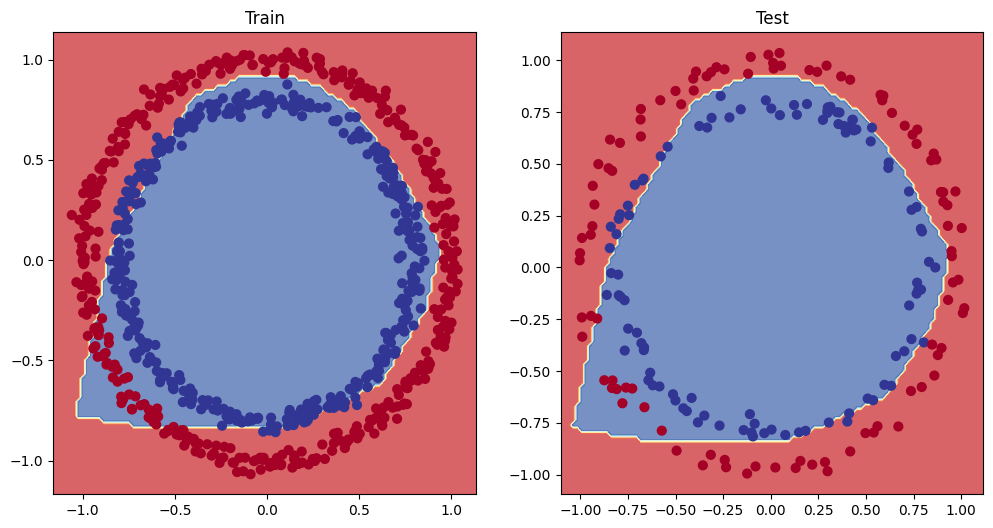

In [260]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)


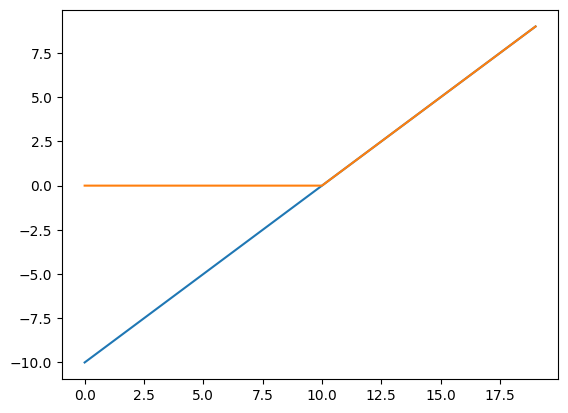

In [261]:
A = torch.arange(-10,10,1)
plt.plot(A)
plt.plot(torch.relu(A))

In [262]:
def relu(x): #Handmaking ReLU function
    return torch.maximum(torch.tensor(0), x)

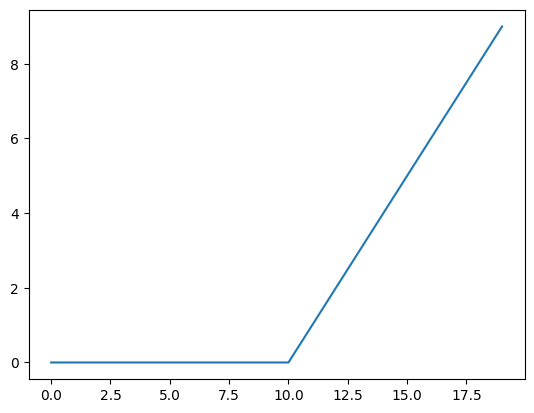

In [263]:
plt.plot(relu(A))

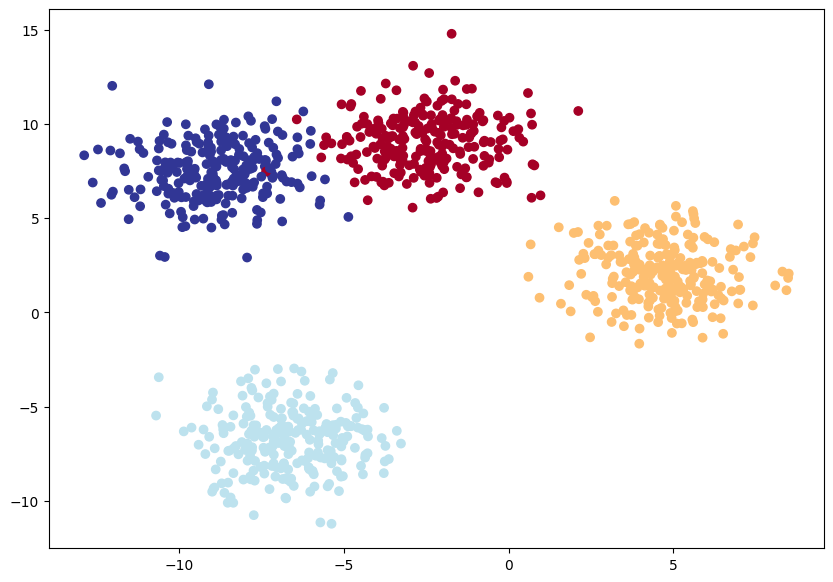

In [264]:
# Create toy dataset
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features=NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

In [265]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [266]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

In [267]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

In [268]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

In [269]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
# tensor([[-0.3084, -0.0762,  0.2150, -0.1012],
#         [ 0.9781,  1.2811,  0.3481, -0.6156],
#         [ 0.3933,  1.0054,  0.7786,  0.7176],
#         [-0.3079,  0.0070,  0.3342,  0.1654],
#         [ 0.3158,  0.4694,  0.1171, -0.7146]], grad_fn=<SliceBackward0>)
# tensor([[0.1931, 0.2435, 0.3259, 0.2375],
#         [0.3237, 0.4382, 0.1724, 0.0658],
#         [0.1755, 0.3237, 0.2580, 0.2428],
#         [0.1702, 0.2332, 0.3234, 0.2732],
#         [0.2992, 0.3488, 0.2453, 0.1068]], grad_fn=<SliceBackward0>)

In [270]:
#Convert to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [271]:
# Fit the Multi class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    model_4.train()

    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_blob_train.type(torch.LongTensor))
    acc = accuracy_fn(y_true = y_blob_train,
                      y_pred = y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true = y_blob_test,
                               y_pred = test_preds)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test Loss {test_loss:.4f} | Test accuracy: {test_acc:.2f}")
# Epoch: 0 | Loss: 1.0432 | Acc: 65.50% | Test Loss 0.5786 | Test accuracy: 95.50
# Epoch: 10 | Loss: 0.1440 | Acc: 99.12% | Test Loss 0.1304 | Test accuracy: 99.00
# Epoch: 20 | Loss: 0.0806 | Acc: 99.12% | Test Loss 0.0722 | Test accuracy: 99.50
# Epoch: 30 | Loss: 0.0592 | Acc: 99.12% | Test Loss 0.0513 | Test accuracy: 99.50
# Epoch: 40 | Loss: 0.0489 | Acc: 99.00% | Test Loss 0.0410 | Test accuracy: 99.50
# Epoch: 50 | Loss: 0.0429 | Acc: 99.00% | Test Loss 0.0349 | Test accuracy: 99.50
# Epoch: 60 | Loss: 0.0391 | Acc: 99.00% | Test Loss 0.0308 | Test accuracy: 99.50
# Epoch: 70 | Loss: 0.0364 | Acc: 99.00% | Test Loss 0.0280 | Test accuracy: 99.50
# Epoch: 80 | Loss: 0.0345 | Acc: 99.00% | Test Loss 0.0259 | Test accuracy: 99.50
# Epoch: 90 | Loss: 0.0330 | Acc: 99.12% | Test Loss 0.0242 | Test accuracy: 99.50

Epoch: 0 | Loss: 1.0432 | Acc: 65.50% | Test Loss 0.5786 | Test accuracy: 95.50
Epoch: 10 | Loss: 0.1440 | Acc: 99.12% | Test Loss 0.1304 | Test accuracy: 99.00
Epoch: 20 | Loss: 0.0806 | Acc: 99.12% | Test Loss 0.0722 | Test accuracy: 99.50
Epoch: 30 | Loss: 0.0592 | Acc: 99.12% | Test Loss 0.0513 | Test accuracy: 99.50
Epoch: 40 | Loss: 0.0489 | Acc: 99.00% | Test Loss 0.0410 | Test accuracy: 99.50
Epoch: 50 | Loss: 0.0429 | Acc: 99.00% | Test Loss 0.0349 | Test accuracy: 99.50
Epoch: 60 | Loss: 0.0391 | Acc: 99.00% | Test Loss 0.0308 | Test accuracy: 99.50
Epoch: 70 | Loss: 0.0364 | Acc: 99.00% | Test Loss 0.0280 | Test accuracy: 99.50
Epoch: 80 | Loss: 0.0345 | Acc: 99.00% | Test Loss 0.0259 | Test accuracy: 99.50
Epoch: 90 | Loss: 0.0330 | Acc: 99.12% | Test Loss 0.0242 | Test accuracy: 99.50


In [272]:
# Make Predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
y_logits[:10]
# 4.33774,10.35386,-14.89479,-9.76424
# 5.01417,-12.03713,3.38600,10.66992
# -5.58852,-13.34480,20.98942,12.77108
# 1.84001,7.55993,-8.60161,-6.99424
# 8.07265,3.29058,-14.59982,-3.61863
# 5.58437,-14.95214,5.01677,13.28906
# -5.97387,-10.19127,18.86551,9.91788
# 7.07546,-0.76013,-9.55311,0.17358
# -5.59185,-18.59902,25.53096,17.57994
# 7.31423,0.71969,-11.20175,-1.20110

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

In [273]:
# Go From logits -> prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]
# 0.00243,0.99757,0.00000,0.00000
# 0.00348,0.00000,0.00068,0.99583
# 0.00000,0.00000,0.99973,0.00027
# 0.00327,0.99673,0.00000,0.00000
# 0.99168,0.00831,0.00000,0.00001
# 0.00045,0.00000,0.00026,0.99929
# 0.00000,0.00000,0.99987,0.00013
# 0.99860,0.00039,0.00000,0.00100
# 0.00000,0.00000,0.99965,0.00035
# 0.99843,0.00137,0.00000,0.00020

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3697e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2266e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5435e-08, 4.7619e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
        [4.5039e-04, 5.4287e-13, 2.5532e-04, 9.9929e-01],
        [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
        [9.9860e-01, 3.9485e-04, 5.9937e-08, 1.0045e-03],
        [3.0436e-14, 6.8303e-20, 9.9965e-01, 3.5218e-04],
        [9.9843e-01, 1.3657e-03, 9.0768e-09, 2.0006e-04]])

In [274]:
# Pred probs to labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10], y_blob_test[:10]
# (tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]),
#  tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

torch.Size([800])


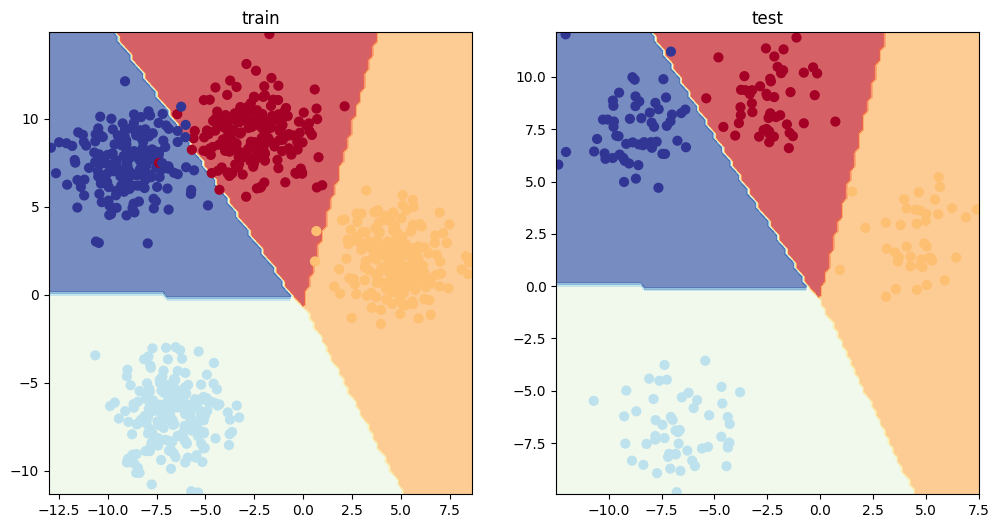

In [289]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [276]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task='multiclass', num_classes=5).to(device)

torchmetric_accuracy(y_preds, y_blob_test)


tensor(0.9950)

In [298]:
from sklearn.datasets import make_moons

NUM_SAMPLES = 1000
RANDOM_SEED = 42

X, y = make_moons(n_samples=NUM_SAMPLES,
                  noise=0.07,
                  random_state=RANDOM_SEED)

X[:10], y[:10]

(array([[-0.03341062,  0.4213911 ],
        [ 0.99882703, -0.4428903 ],
        [ 0.88959204, -0.32784256],
        [ 0.34195829, -0.41768975],
        [-0.83853099,  0.53237483],
        [ 0.59906425, -0.28977331],
        [ 0.29009023, -0.2046885 ],
        [-0.03826868,  0.45942924],
        [ 1.61377123, -0.2939697 ],
        [ 0.693337  ,  0.82781911]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [299]:
# Turn data into a DataFrame
import pandas as pd
data_df = pd.DataFrame({"X0": X[:, 0],
                        "X1": X[:, 1],
                        "y": y})
data_df.head()

,X0,X1,y
0,-0.03341,0.42139,1
1,0.99883,-0.44289,1
2,0.88959,-0.32784,1
3,0.34196,-0.41769,1
4,-0.83853,0.53237,0


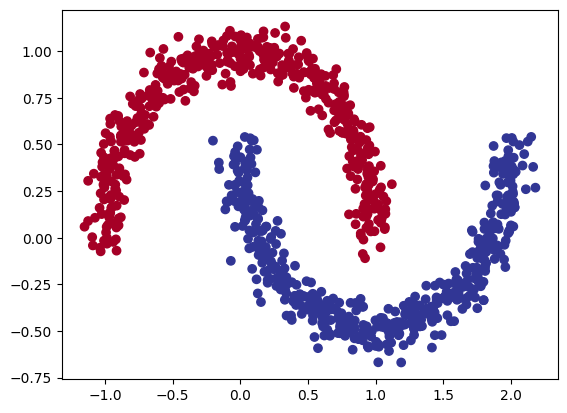

In [300]:
# Visualize the data on a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [301]:
# Turn data into tensors
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [302]:
import torch
from torch import nn

class MoonModelV0(nn.Module):
    def __init__(self, in_features, out_features, hidden_units):
        super().__init__()

        self.layer1 = nn.Linear(in_features=in_features,
                                 out_features=hidden_units)
        self.layer2 = nn.Linear(in_features=hidden_units,
                                 out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units,
                                out_features=out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_0 = MoonModelV0(in_features=2,
                      out_features=1,
                      hidden_units=10).to(device)
model_0

MoonModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [303]:

loss_fn = nn.BCEWithLogitsLoss() # sigmoid layer built-in
# loss_fn = nn.BCELoss() # requires sigmoid layer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of model to optimize
                            lr=0.1) # learning rate

In [305]:
# What's coming out of our model?

# logits (raw outputs of model)
print("Logits:")
print(model_0(X_train.to(device)[:10]).squeeze())

# Prediction probabilities
print("Pred probs:")
print(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze()))

# Prediction probabilities
print("Pred labels:")
print(torch.round(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze())))

Logits:
tensor([0.0019, 0.0094, 0.0161, 0.0185, 0.0284, 0.0192, 0.0291, 0.0196, 0.0258,
        0.0079], grad_fn=<SqueezeBackward0>)
Pred probs:
tensor([0.5005, 0.5024, 0.5040, 0.5046, 0.5071, 0.5048, 0.5073, 0.5049, 0.5065,
        0.5020], grad_fn=<SigmoidBackward0>)
Pred labels:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<RoundBackward0>)


In [306]:
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [307]:
torch.manual_seed(RANDOM_SEED)

epochs=1000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  # print(y_logits[:5]) # model raw outputs are "logits"
  y_pred_probs = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_probs)

  # 2. Calculaute the loss
  loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs
  acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Caculate the loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test.int())

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.70 Acc: 0.37 | Test loss: 0.69 Test acc: 0.50
Epoch: 100 | Loss: 0.39 Acc: 0.82 | Test loss: 0.40 Test acc: 0.76
Epoch: 200 | Loss: 0.24 Acc: 0.88 | Test loss: 0.24 Test acc: 0.89
Epoch: 300 | Loss: 0.20 Acc: 0.91 | Test loss: 0.19 Test acc: 0.94
Epoch: 400 | Loss: 0.17 Acc: 0.93 | Test loss: 0.15 Test acc: 0.94
Epoch: 500 | Loss: 0.12 Acc: 0.95 | Test loss: 0.11 Test acc: 0.96
Epoch: 600 | Loss: 0.08 Acc: 0.98 | Test loss: 0.07 Test acc: 0.99
Epoch: 700 | Loss: 0.06 Acc: 0.99 | Test loss: 0.05 Test acc: 1.00
Epoch: 800 | Loss: 0.04 Acc: 0.99 | Test loss: 0.03 Test acc: 1.00
Epoch: 900 | Loss: 0.03 Acc: 1.00 | Test loss: 0.02 Test acc: 1.00


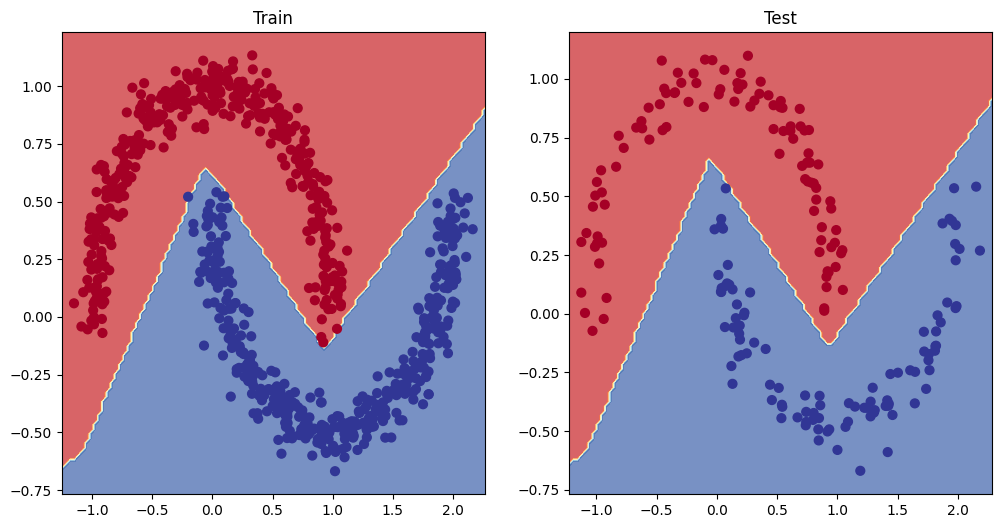

In [308]:

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)